In [ ]:
#importa el Api de github para python
!pip install PyGithub requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 22.7 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [61]:
#esta es la manera de obtener la información de un usuario en forma
#de diccionario
import requests
from pprint import pprint
username = "Xmahana"
url = f"https://api.github.com/users/{username}"
user_data = requests.get(url).json()
(user_data)

{'login': 'Xmahana',
 'id': 97571187,
 'node_id': 'U_kgDOBdDRcw',
 'avatar_url': 'https://avatars.githubusercontent.com/u/97571187?v=4',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/Xmahana',
 'html_url': 'https://github.com/Xmahana',
 'followers_url': 'https://api.github.com/users/Xmahana/followers',
 'following_url': 'https://api.github.com/users/Xmahana/following{/other_user}',
 'gists_url': 'https://api.github.com/users/Xmahana/gists{/gist_id}',
 'starred_url': 'https://api.github.com/users/Xmahana/starred{/owner}{/repo}',
 'subscriptions_url': 'https://api.github.com/users/Xmahana/subscriptions',
 'organizations_url': 'https://api.github.com/users/Xmahana/orgs',
 'repos_url': 'https://api.github.com/users/Xmahana/repos',
 'events_url': 'https://api.github.com/users/Xmahana/events{/privacy}',
 'received_events_url': 'https://api.github.com/users/Xmahana/received_events',
 'type': 'User',
 'site_admin': False,
 'name': 'José Angel Magaña García',
 'company': None,
 'blo

In [58]:
#obtenemos datos de seguidores para ver las conexiones

users = {}
usernames = []
usernames.append("Xmahana")

#obtenemos los seguidores del usuario
def getFollowers(username):
  followers = []
  url = f"https://api.github.com/users/{username}/followers"
  json_followers = requests.get(url).json()
  for follower in json_followers:
    if(type(follower) == dict):
     followers.append(follower['login'])
  return followers

#obtenemos la gente que sigue el usuario
def getFollowings(username):
  followings = []
  url = f"https://api.github.com/users/{username}/following"
  json_followings = requests.get(url).json()
  for following in json_followings:
    if(type(following) == dict):
      followings.append(following['login'])
  return followings

#obtenemos los datos de la gente que se sigue mutuamente
def getFriends(username):
  followers = getFollowers(username)
  following = getFollowings(username)
  friends = []
  for follower in followers:
    if (follower in following):
      if(follower not in friends):
        friends.append(follower)
  return friends

#Esta es una manera de obtener varios nombres de usuario a través de los amigos
#de una única persona
def collectUserNames(username):
  usernames = [username]
  for name in usernames:
    if(len(usernames)<20):
     friends = getFriends(name)
     for friend in friends:
      if( friend not in usernames):
        usernames.append(friend)
    else:
      return usernames
  return usernames

usernames = collectUserNames("KevinMed25")

print(usernames)


['KevinMed25', 'Cristianpan', 'Oswaldo-Chan', 'AlvaroXC', 'EstebanMadrazo', 'Mauriciocr207', 'AbrahamXTS', 'Dianita-01', 'AdjanyArmenta', 'CarlosJCD', 'ErickArzat', 'JosePucMoo', 'jfer1990', 'migueravila', 'tonycituk', 'Teodoro-lab', 'doguedogue', 'atilaorlov', 'adrianfonsecal', 'Luis-Inzunza', 'diegoalamilla', 'kirake-a']


In [59]:
#obtenemos la información para usar en nuestro análisis

#obtenemos los nombres de usuarios que serían nuestros nodos

usernames = collectUserNames("KevinMed25")

#obtenemos las conexiones entre cada uno

def getFriendsDict(usernames):
  friends_dict = {}
  for user in usernames:
    friends_dict[user] = getFriends(user)
  return friends_dict


def getEdges(usernames):
  edges = []
  friends_dict = getFriendsDict(usernames)
  for user in usernames:
    for friend in friends_dict[user]:
     edge1 = (user, friend)
     edge2 = (friend, user)
     if(not(edge1 in edges or edge2 in edges)):
      edges.append(edge1)
  return edges

edges = getEdges(usernames)

print(edges)

[('KevinMed25', 'Cristianpan'), ('KevinMed25', 'Oswaldo-Chan'), ('KevinMed25', 'AlvaroXC'), ('Cristianpan', 'EstebanMadrazo'), ('Cristianpan', 'Mauriciocr207'), ('Cristianpan', 'AbrahamXTS'), ('Cristianpan', 'Dianita-01'), ('Cristianpan', 'AdjanyArmenta'), ('Cristianpan', 'CarlosJCD'), ('Cristianpan', 'Oswaldo-Chan'), ('Cristianpan', 'AlvaroXC'), ('Cristianpan', 'ErickArzat'), ('Cristianpan', 'JosePucMoo'), ('Mauriciocr207', 'jfer1990'), ('AbrahamXTS', 'migueravila'), ('AbrahamXTS', 'tonycituk'), ('AbrahamXTS', 'Teodoro-lab'), ('AbrahamXTS', 'Dianita-01'), ('Dianita-01', 'JosePucMoo'), ('AdjanyArmenta', 'doguedogue'), ('AdjanyArmenta', 'atilaorlov'), ('AdjanyArmenta', 'tonycituk'), ('AdjanyArmenta', 'AbrahamXTS'), ('AdjanyArmenta', 'adrianfonsecal'), ('AdjanyArmenta', 'Luis-Inzunza'), ('AdjanyArmenta', 'diegoalamilla'), ('AdjanyArmenta', 'kirake-a'), ('ErickArzat', 'kirake-a')]


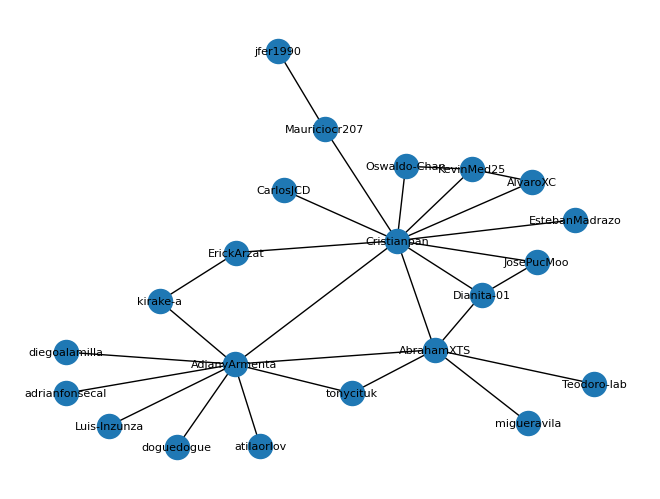

In [60]:
#importamos networkx para poder trabajar con grafos
import networkx as nx

#agregamos los nodos al grafo

G = nx.Graph()

G.add_nodes_from(usernames)
G.add_edges_from(edges)

nx.draw(G, with_labels=True, font_size=8)


In [62]:
for nodo in G.nodes:
  print("Grado del nodo", nodo + ":", len(list(G.neighbors(nodo))))

Grado del nodo KevinMed25: 3
Grado del nodo Cristianpan: 11
Grado del nodo Oswaldo-Chan: 2
Grado del nodo AlvaroXC: 2
Grado del nodo EstebanMadrazo: 1
Grado del nodo Mauriciocr207: 2
Grado del nodo AbrahamXTS: 6
Grado del nodo Dianita-01: 3
Grado del nodo AdjanyArmenta: 9
Grado del nodo CarlosJCD: 1
Grado del nodo ErickArzat: 2
Grado del nodo JosePucMoo: 2
Grado del nodo jfer1990: 1
Grado del nodo migueravila: 1
Grado del nodo tonycituk: 2
Grado del nodo Teodoro-lab: 1
Grado del nodo doguedogue: 1
Grado del nodo atilaorlov: 1
Grado del nodo adrianfonsecal: 1
Grado del nodo Luis-Inzunza: 1
Grado del nodo diegoalamilla: 1
Grado del nodo kirake-a: 2


In [63]:
inter_centralidad = nx.betweenness_centrality(G)
inter_centralidad

{'KevinMed25': 0.002380952380952381,
 'Cristianpan': 0.6523809523809526,
 'Oswaldo-Chan': 0.0,
 'AlvaroXC': 0.0,
 'EstebanMadrazo': 0.0,
 'Mauriciocr207': 0.09523809523809525,
 'AbrahamXTS': 0.23015873015873015,
 'Dianita-01': 0.00873015873015873,
 'AdjanyArmenta': 0.49603174603174605,
 'CarlosJCD': 0.0,
 'ErickArzat': 0.02301587301587302,
 'JosePucMoo': 0.0,
 'jfer1990': 0.0,
 'migueravila': 0.0,
 'tonycituk': 0.0,
 'Teodoro-lab': 0.0,
 'doguedogue': 0.0,
 'atilaorlov': 0.0,
 'adrianfonsecal': 0.0,
 'Luis-Inzunza': 0.0,
 'diegoalamilla': 0.0,
 'kirake-a': 0.015873015873015876}

In [64]:
highest_inter_centrality_node = max(G.nodes,key=inter_centralidad.get)

highest_inter_centrality_node

'Cristianpan'

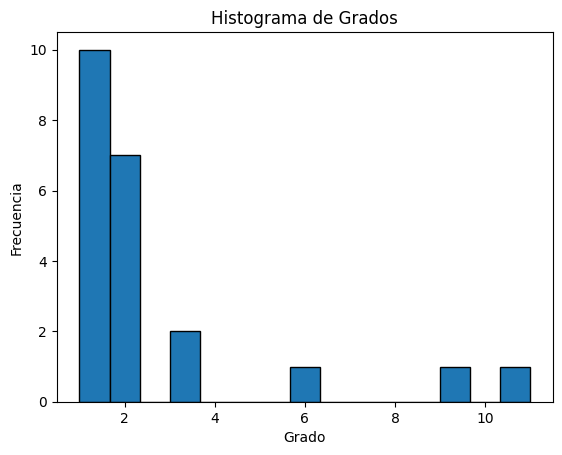

In [68]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

# Dibujar el histograma
plt.hist(degree_sequence, bins='auto', edgecolor='black')

# Configurar el título y las etiquetas
plt.title('Histograma de Grados')
plt.xlabel('Grado')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()



In [ ]:
intercentralidad = nx.centrality.beetweenness_centrality(G)
secuencia_intercentralidad = list(intercentralidad.values())
